In [90]:
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Dropout, Flatten,MaxPooling2D, BatchNormalization
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam, Adadelta, RMSprop
from keras.utils import np_utils
from keras.losses import binary_crossentropy, categorical_crossentropy
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import pdb
from keras.datasets import mnist
import keras.callbacks as cb

In [3]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [48]:
def train_model(model):
    return model.fit(x_train, y_train, epochs=20, batch_size=128,
                callbacks=[history],
                validation_data=(x_test, y_test))

## Varying Conv Layers / Architecture

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 2.4005 - acc: 0.6325 - val_loss: 0.4208 - val_acc: 0.8817
Epoch 2/20
 - 5s - loss: 0.6352 - acc: 0.8074 - val_loss: 0.2947 - val_acc: 0.9167
Epoch 3/20
 - 5s - loss: 0.4915 - acc: 0.8499 - val_loss: 0.2219 - val_acc: 0.9345
Epoch 4/20
 - 5s - loss: 0.4246 - acc: 0.8716 - val_loss: 0.1911 - val_acc: 0.9423
Epoch 5/20
 - 7s - loss: 0.3780 - acc: 0.8832 - val_loss: 0.1626 - val_acc: 0.9525
Epoch 6/20
 - 5s - loss: 0.3484 - acc: 0.8942 - val_loss: 0.1625 - val_acc: 0.9497
Epoch 7/20
 - 5s - loss: 0.3329 - acc: 0.8981 - val_loss: 0.1615 - val_acc: 0.9538
Epoch 8/20
 - 5s - loss: 0.3212 - acc: 0.9033 - val_loss: 0.1710 - val_acc: 0.9520
Epoch 9/20
 - 5s - loss: 0.3029 - acc: 0.9077 - val_loss: 0.1487 - val_acc: 0.9523
Epoch 10/20
 - 5s - loss: 0.2892 - acc: 0.9123 - val_loss: 0.1354 - val_acc: 0.9584
Epoch 11/20
 - 5s - loss: 0.2855 - acc: 0.9122 - val_loss: 0.1373 - val_acc: 0.9581
Epoch 12/20
 - 5s - loss: 0.2757 - 

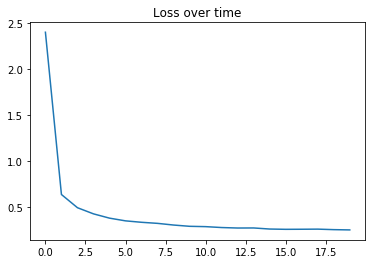

In [18]:
plt.plot(history.history['loss'])
plt.title("Loss over time")
plt.show()

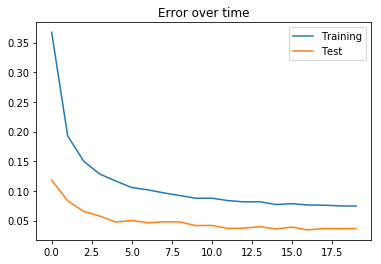

In [21]:
tPlot, = plt.plot([1 - x for x in history.history['acc']])
vPlot, = plt.plot([1 - x for x in history.history['val_acc']])
plt.legend([tPlot, vPlot], ["Training", "Test"])
plt.title("Error over time")
plt.show()

In [22]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 1.5374 - acc: 0.5757 - val_loss: 0.3852 - val_acc: 0.8875
Epoch 2/20
 - 6s - loss: 0.5763 - acc: 0.8227 - val_loss: 0.2565 - val_acc: 0.9248
Epoch 3/20
 - 6s - loss: 0.4512 - acc: 0.8628 - val_loss: 0.2122 - val_acc: 0.9405
Epoch 4/20
 - 6s - loss: 0.3878 - acc: 0.8805 - val_loss: 0.1877 - val_acc: 0.9457
Epoch 5/20
 - 6s - loss: 0.3564 - acc: 0.8931 - val_loss: 0.1718 - val_acc: 0.9495
Epoch 6/20
 - 6s - loss: 0.3325 - acc: 0.8981 - val_loss: 0.1569 - val_acc: 0.9552
Epoch 7/20
 - 6s - loss: 0.3117 - acc: 0.9046 - val_loss: 0.1571 - val_acc: 0.9524
Epoch 8/20
 - 6s - loss: 0.3030 - acc: 0.9087 - val_loss: 0.1542 - val_acc: 0.9556
Epoch 9/20
 - 6s - loss: 0.2840 - acc: 0.9127 - val_loss: 0.1322 - val_acc: 0.9577
Epoch 10/20
 - 6s - loss: 0.2729 - acc: 0.9179 - val_loss: 0.1358 - val_acc: 0.9583
Epoch 11/20
 - 7s - loss: 0.2674 - acc: 0.9181 - val_loss: 0.1343 - val_acc: 0.9600
Epoch 12/20
 - 8s - loss: 0.2561 - 

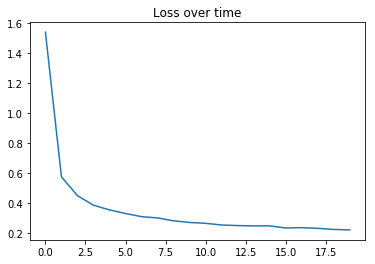

In [23]:
plt.plot(history.history['loss'])
plt.title("Loss over time")
plt.show()

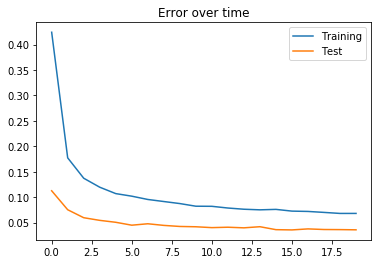

In [24]:
tPlot, = plt.plot([1 - x for x in history.history['acc']])
vPlot, = plt.plot([1 - x for x in history.history['val_acc']])
plt.legend([tPlot, vPlot], ["Training", "Test"])
plt.title("Error over time")
plt.show()

In [40]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss=categorical_crossentropy,
          optimizer=Adam(0.001),
          metrics=['accuracy'])
model2.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 189s 3ms/step - loss: 7.3387 - acc: 0.5211 - val_loss: 0.1558 - val_acc: 0.9574
Epoch 2/30
60000/60000 [==============================] - 5415s 90ms/step - loss: 0.1945 - acc: 0.9447 - val_loss: 0.0633 - val_acc: 0.9805
Epoch 3/30
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1131 - acc: 0.9678 - val_loss: 0.0429 - val_acc: 0.9856
Epoch 4/30
60000/60000 [==============================] - 216s 4ms/step - loss: 0.0911 - acc: 0.9734 - val_loss: 0.0379 - val_acc: 0.9880
Epoch 5/30
60000/60000 [==============================] - 234s 4ms/step - loss: 0.0709 - acc: 0.9787 - val_loss: 0.0396 - val_acc: 0.9882
Epoch 6/30
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0646 - acc: 0.9813 - val_loss: 0.0346 - val_acc: 0.9895
Epoch 7/30
40576/60000 [===================>..........] - ETA: 1:10 - loss: 0.0594 - acc: 0.9820

KeyboardInterrupt: 

I cut the above convolutional neural network run short because we achieved a validation accuracy of ~99% incredibly fast. I did not see any more of a need to continue running.

What I find cool about using these convolutional neural networks is that we get pretty good performance pretty fast using them. I know that using Adam on the "classify if the number is a 5 or not" problem, we achieve about 98% validation accuracy pretty quickly.

Using convolutional neural networks, we achieve pretty similar performance pretty quickly, but on a much harder classification problem.

Also, at the same time that decreasing stride length gets us much better performance, it definitely takes us much longer to train our algorithm. This is because switching from a stride length of (5,5) to (1,1) for our (5,5) convolutional filter gives us more than 10x the amount of features to use in our maxpool layer, which means we have many more features to process. For example, our most recent model has 1,199,882 parameters, whereas our first CNN has only 22,250 parameters in total. However, the smaller stride helps us detect features that might have been skipped over had we used a higher stride. This is probalby why a smaller stride allows us to achieve much better accuracy on the problem.

In [46]:
print("High stride has", model.count_params(), "parameters")
print("Low stride has", model2.count_params(), "parameters")

High stride has 22250 parameters
Low stride has 1199882 parameters


## Varying Learning Rates

The below experiments were run using a suboptimal choice of stride because I wanted a network I could train quickly enough to actually study the effect of hyperparameters, rather than having to wait for training all the time.

In [53]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(0.001),
          metrics=['accuracy'])
history4 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 1.9500 - acc: 0.4794 - val_loss: 0.6259 - val_acc: 0.8343
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.8002 - acc: 0.7589 - val_loss: 0.3428 - val_acc: 0.9078
Epoch 3/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.5745 - acc: 0.8261 - val_loss: 0.2629 - val_acc: 0.9267
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.4733 - acc: 0.8563 - val_loss: 0.2189 - val_acc: 0.9375
Epoch 5/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4139 - acc: 0.8742 - val_loss: 0.2013 - val_acc: 0.9414
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3744 - acc: 0.8864 - val_loss: 0.1863 - val_acc: 0.9445
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3450 - acc: 0.8951 - val_loss: 0.1738 - val_acc

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(0.005),
          metrics=['accuracy'])
history = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 99us/step - loss: 1.2476 - acc: 0.6081 - val_loss: 0.3835 - val_acc: 0.8915
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.6189 - acc: 0.8054 - val_loss: 0.3010 - val_acc: 0.9154
Epoch 3/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.5581 - acc: 0.8279 - val_loss: 0.2667 - val_acc: 0.9249
Epoch 4/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.5130 - acc: 0.8431 - val_loss: 0.2162 - val_acc: 0.9358
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.4999 - acc: 0.8485 - val_loss: 0.2428 - val_acc: 0.9354
Epoch 6/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.4957 - acc: 0.8508 - val_loss: 0.2260 - val_acc: 0.9324
Epoch 7/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.4867 - acc: 0.8538 - val_loss: 0.2401 - val_acc

In [51]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(0.01),
          metrics=['accuracy'])
history2 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 12.8723 - acc: 0.1997 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 14.2255 - acc: 0.1174 - val_loss: 13.0315 - val_acc: 0.1915
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 13.3825 - acc: 0.1697 - val_loss: 14.2597 - val_acc: 0.1153
Epoch 4/20
60000/60000 [==============================] - 6s 100us/step - loss: 14.1327 - acc: 0.1232 - val_loss: 14.2839 - val_acc: 0.1138
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 14.1976 - acc: 0.1191 - val_loss: 14.2839 - val_acc: 0.1138
Epoch 6/20
60000/60000 [==============================] - 6s 108us/step - loss: 13.8789 - acc: 0.1389 - val_loss: 13.1459 - val_acc: 0.1844
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 13.8021 - acc: 0.1437 - val_loss

In [52]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(0.0005),
          metrics=['accuracy'])
history3 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 2.1582 - acc: 0.4064 - val_loss: 0.7820 - val_acc: 0.7715
Epoch 2/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.9592 - acc: 0.6920 - val_loss: 0.4169 - val_acc: 0.8805
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.6443 - acc: 0.8009 - val_loss: 0.3015 - val_acc: 0.9136
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.5115 - acc: 0.8426 - val_loss: 0.2448 - val_acc: 0.9312
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.4374 - acc: 0.8660 - val_loss: 0.2104 - val_acc: 0.9373
Epoch 6/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.3870 - acc: 0.8818 - val_loss: 0.1971 - val_acc: 0.9446
Epoch 7/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.3572 - acc: 0.8913 - val_loss: 0.1814 - v

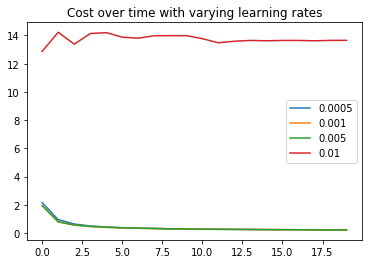

In [56]:
histories = [history3, history4, history, history2]
costs = [x.history['loss'] for x in histories]
plots = [plt.plot(x)[0] for x in costs]
plt.legend(plots, [0.0005, 0.001, 0.005, 0.01])
plt.title("Cost over time with varying learning rates")
plt.show()
plt.close()

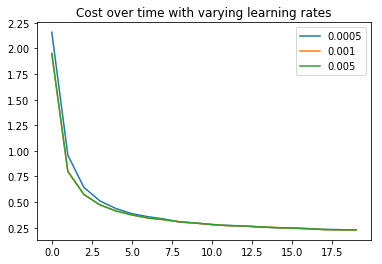

In [58]:
histories = [history3, history4, history]
costs = [x.history['loss'] for x in histories]
plots = [plt.plot(x)[0] for x in costs]
plt.legend(plots, [0.0005, 0.001, 0.005])
plt.title("Cost over time with varying learning rates")
plt.show()
plt.close()

Like with other choices of neural networks, our convolutional neural network seems to be pretty sensitive to choices of learning rate: too high a learning rate and we don't learn, although a just-right learning rate gets us to learn more quickly. For this particular problem, it seems that the default parameters for Adam work pretty well, and actually gets us the best validation accuracy. Apart from the first few iterations, all learning rate choices seem to perform pretty similarly otherwise.

## Varying Optimizer

In [81]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 1.8477 - acc: 0.5134 - val_loss: 0.5029 - val_acc: 0.8567
Epoch 2/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.7215 - acc: 0.7738 - val_loss: 0.3206 - val_acc: 0.9049
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.5505 - acc: 0.8283 - val_loss: 0.2555 - val_acc: 0.9284
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4535 - acc: 0.8588 - val_loss: 0.2150 - val_acc: 0.9361
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.3958 - acc: 0.8780 - val_loss: 0.1865 - val_acc: 0.9479
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3611 - acc: 0.8897 - val_loss: 0.1761 - val_acc: 0.9501
Epoch 7/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3319 - acc: 0.8974 - val_loss: 0.1610 - val

In [66]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adadelta(),
          metrics=['accuracy'])
history2 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 111us/step - loss: 1.6941 - acc: 0.5143 - val_loss: 0.5394 - val_acc: 0.8410
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.8170 - acc: 0.7413 - val_loss: 0.3914 - val_acc: 0.8905
Epoch 3/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.6374 - acc: 0.8022 - val_loss: 0.3103 - val_acc: 0.9106
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.5332 - acc: 0.8360 - val_loss: 0.2708 - val_acc: 0.9201
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.4787 - acc: 0.8543 - val_loss: 0.2374 - val_acc: 0.9316
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4368 - acc: 0.8666 - val_loss: 0.2343 - val_acc: 0.9283
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.4178 - acc: 0.8732 - val_loss: 0.2306 - val_ac

In [68]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=RMSprop(),
          metrics=['accuracy'])
history3 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 120us/step - loss: 1.4479 - acc: 0.6172 - val_loss: 0.4714 - val_acc: 0.8623
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.6337 - acc: 0.8116 - val_loss: 0.2909 - val_acc: 0.9164
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.4973 - acc: 0.8511 - val_loss: 0.2245 - val_acc: 0.9363
Epoch 4/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.4273 - acc: 0.8741 - val_loss: 0.2022 - val_acc: 0.9407
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.3892 - acc: 0.8838 - val_loss: 0.1922 - val_acc: 0.9438
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.3695 - acc: 0.8912 - val_loss: 0.1939 - val_acc: 0.9444
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.3509 - acc: 0.8982 - val_loss: 0.1829 - 

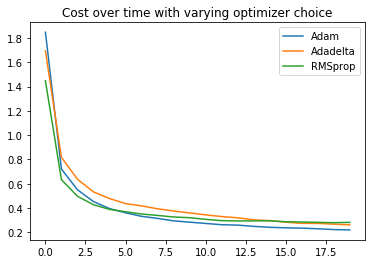

In [83]:
histories = [history, history2, history3]
costs = [x.history['loss'] for x in histories]
plots = [plt.plot(x)[0] for x in costs]
plt.legend(plots, ["Adam", "Adadelta", "RMSprop"])
plt.title("Cost over time with varying optimizer choice")
plt.show()
plt.close()

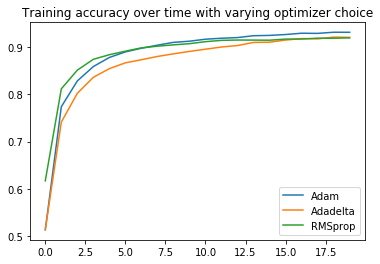

In [84]:
histories = [history, history2, history3]
costs = [x.history['acc'] for x in histories]
plots = [plt.plot(x)[0] for x in costs]
plt.legend(plots, ["Adam", "Adadelta", "RMSprop"])
plt.title("Training accueracy over time with varying optimizer choice")
plt.show()
plt.close()

As could probably have been expected, Adam is the best optimizer on our data. This could probably have been expected, since Adam is essentially an "improvement" on the other optimization methods we are experimenting wth. It does seem that Adam and RMSprop go down more quickly than does Adadelta, although Adadelta does overtake RMSprop given more iterations. None of the three methods really ever run into local minima or saddlepoints, although this may be due to the problem or architectures and not really due to the choice of optimization algorithm itself.

## Varying Normalization Method

### Just Dropout - 92.71/95.92 train/val accuracy

In [88]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history = train_model(model)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 1.9913 - acc: 0.4913 - val_loss: 0.5871 - val_acc: 0.8423
Epoch 2/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.7770 - acc: 0.7572 - val_loss: 0.3705 - val_acc: 0.8997
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5799 - acc: 0.8201 - val_loss: 0.2856 - val_acc: 0.9188
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.4880 - acc: 0.8492 - val_loss: 0.2562 - val_acc: 0.9241
Epoch 5/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.4266 - acc: 0.8679 - val_loss: 0.2241 - val_acc: 0.9297
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.3930 - acc: 0.8785 - val_loss: 0.2075 - val_acc: 0.9377
Epoch 7/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.3603 - acc: 0.8891 - val_loss: 0.1858 - va

### One batch normalization layer with L2 weight regularization - 94.88/97.21 train/val accuracy

In [91]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu', 
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', W_regularizer=l2(0.1)))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history2 = train_model(model)

/home/jasperlu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_regularizer=<keras.reg...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 1.4957 - acc: 0.7096 - val_loss: 0.5486 - val_acc: 0.9271
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.6510 - acc: 0.8818 - val_loss: 0.3977 - val_acc: 0.9490
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5285 - acc: 0.9053 - val_loss: 0.3299 - val_acc: 0.9567
Epoch 4/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4479 - acc: 0.9192 - val_loss: 0.2904 - val_acc: 0.9571
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4057 - acc: 0.9260 - val_loss: 0.2649 - val_acc: 0.9620
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.3738 - acc: 0.9297 - val_loss: 0.2435 - val_acc: 0.9638
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3474 - acc: 0.9337 - val_loss: 0.2213 - val_a

### Batch Normalization with Dropout - 96.49/97.69 train/val accuracy

In [92]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history2 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 275us/step - loss: 0.8872 - acc: 0.7183 - val_loss: 0.2197 - val_acc: 0.9331
Epoch 2/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.3470 - acc: 0.8957 - val_loss: 0.1535 - val_acc: 0.9528
Epoch 3/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.2580 - acc: 0.9220 - val_loss: 0.1263 - val_acc: 0.9609
Epoch 4/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.2144 - acc: 0.9351 - val_loss: 0.1104 - val_acc: 0.9659
Epoch 5/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.1917 - acc: 0.9422 - val_loss: 0.1052 - val_acc: 0.9683
Epoch 6/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.1739 - acc: 0.9474 - val_loss: 0.0984 - val_acc: 0.9705
Epoch 7/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.1614 - acc: 0.9504 - val_loss: 0.

### Batch Normalization without Dropout - 99.45/97.19 train/val accuracy

In [93]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history2 = train_model(model)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.3893 - acc: 0.8807 - val_loss: 0.1509 - val_acc: 0.9540
Epoch 2/20
60000/60000 [==============================] - 16s 265us/step - loss: 0.1263 - acc: 0.9615 - val_loss: 0.1212 - val_acc: 0.9630
Epoch 3/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0936 - acc: 0.9711 - val_loss: 0.0978 - val_acc: 0.9687
Epoch 4/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0763 - acc: 0.9763 - val_loss: 0.1098 - val_acc: 0.9644
Epoch 5/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0655 - acc: 0.9795 - val_loss: 0.0878 - val_acc: 0.9736
Epoch 6/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0544 - acc: 0.9829 - val_loss: 0.0837 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0489 - acc: 0.9847 - val_loss: 0.

### Batch Normalization with Dropout and DenseNet L2 regularization - 95.86/97.10 train/val accuracy

In [95]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=(28, 28, 1), strides=(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, kernel_size=(4, 4),
                activation='relu',
                input_shape=(28, 28, 1), strides=(4, 4)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu', W_regularizer=l2(0.1)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=categorical_crossentropy,
          optimizer=Adam(),
          metrics=['accuracy'])
history3 = train_model(model)

/home/jasperlu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 528us/step - loss: 1.9129 - acc: 0.7400 - val_loss: 0.3421 - val_acc: 0.9380
Epoch 2/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.3880 - acc: 0.9020 - val_loss: 0.2136 - val_acc: 0.9528
Epoch 3/20
60000/60000 [==============================] - 28s 461us/step - loss: 0.3102 - acc: 0.9223 - val_loss: 0.1884 - val_acc: 0.9579
Epoch 4/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.2758 - acc: 0.9322 - val_loss: 0.1662 - val_acc: 0.9632
Epoch 5/20
60000/60000 [==============================] - 28s 466us/step - loss: 0.2489 - acc: 0.9386 - val_loss: 0.1604 - val_acc: 0.9644
Epoch 6/20
60000/60000 [==============================] - 28s 464us/step - loss: 0.2363 - acc: 0.9425 - val_loss: 0.1601 - val_acc: 0.9665
Epoch 7/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.2305 - acc: 0.9442 - val_loss: 0.

| Technique      | Train Accuracy           | Validation Accuracy| Val minus Train |
| ------------- |:-------------:| :-----:| ----:|
| Dropout    | 92.71 | 95.92 | 3.21 |
| L2 Weight Regularization, some batch normalization      | 94.88 |   97.21 | 2.33 |
| Full batch normalization | 99.45 |  97.19 | -2.26 |
| Batch normalization with dropout | 96.49 | 97.69 | 1.2 |
| Batch normalization with dropout and l2 regularization | 95.86 | 97.10 |  1.24 |

Over the course of working on this assignment, I've found it pretty interesting that I generally have a better validation accuracy on the problem than I do a training accuracy. It seems that batch normalization with dropout performs the best on our problem. Maybe this is to be expected, since there is a good amount of normalization going on in general there, and perhaps adding in L2 normalization as well is a little "too much" normalization. Without dropout, our batch normalized network overfits to the training data very easily, without any real corresponding increase in validation accuracy. Meanwhile, just dropout achieves pretty poor accuracy in general. This tells me taht 

In [ ]:
[1295,3060,3916,4689,5249,5788,6219,6447,6738,7355,7308,7780,8045,8185,8413,8683,8776,8983,8776,8989]